# WASP-39b NIRCam comparison

**Author:** Hannu Parviainen </br>
**Edited:** 2025-06-11 </br>
**ExoIris version:** 

This notebook compares the WASP-39b ExoIris results with the [Carter et al. (2024)](https://www.nature.com/articles/s41550-024-02292-x) results.

In [1]:
import pandas as pd
from matplotlib.pyplot import subplots, setp
from exoiris import load_model, ExoIris

In [2]:
sp_carter = pd.read_csv('carter_spectra/Fixed_LimbDarkening/NIRCam_F322W2/bins_scale5.csv')

In [7]:
sp_wn = load_model('WASP-39b-NIRCam-wn.fits').transmission_spectrum
sp_gp = load_model('WASP-39b-NIRCam-gp.fits').transmission_spectrum

## White noise analysis

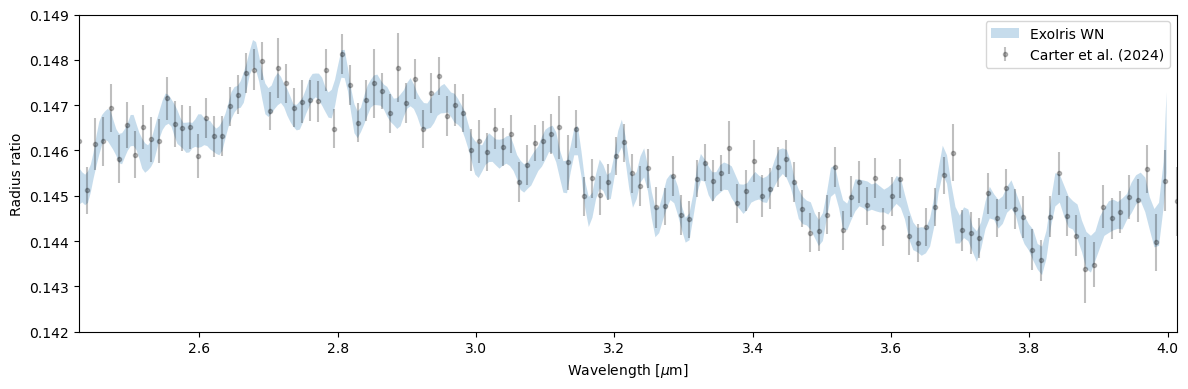

In [5]:
fig, ax = subplots(figsize=(12, 4))
ax.fill_between(sp_wn['wavelength'], 
                sp_wn['radius_ratio'] - sp_wn['radius_ratio_e'], 
                sp_wn['radius_ratio'] + sp_wn['radius_ratio_e'], 
                alpha=0.25, label='ExoIris WN')
ax.errorbar(sp_carter.wave,
            sp_carter['rp/rs'], 
            [sp_carter['rp/rs_err_low'], sp_carter['rp/rs_err_hih']], 
            fmt='.', c='k', alpha=0.25, label='Carter et al. (2024)')
ax.legend()
setp(ax, xlim=sp_carter.wave.values[[0,-1]], ylim=(0.142, 0.149), 
     xlabel='Wavelength [$\mu$m]', ylabel='Radius ratio')
fig.tight_layout()

## GP systematics analysis

Changing to use a Gaussian process to model the correlated noise in the spectrophotometric light curves doesn't change the spectrum much, but increases the uncertainties.

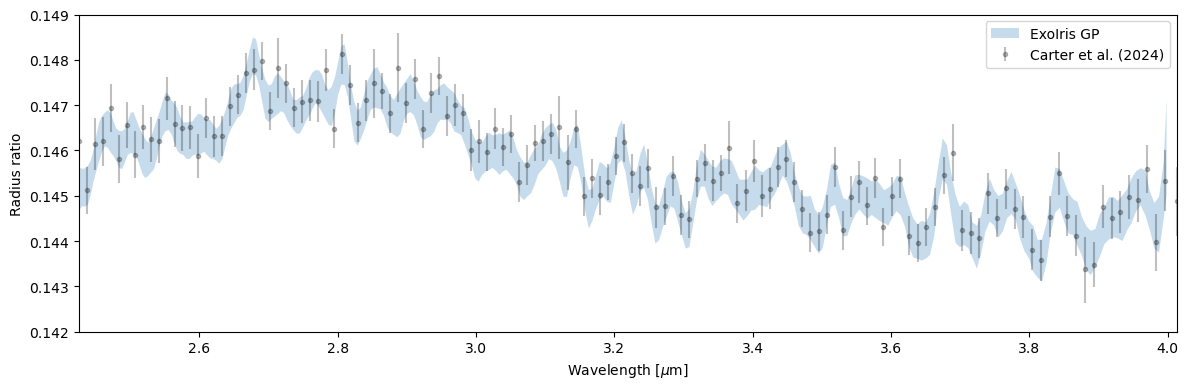

In [8]:
fig, ax = subplots(figsize=(12, 4))
ax.fill_between(sp_gp['wavelength'], 
                sp_gp['radius_ratio'] - sp_gp['radius_ratio_e'], 
                sp_gp['radius_ratio'] + sp_gp['radius_ratio_e'], 
                alpha=0.25, label='ExoIris GP')
ax.errorbar(sp_carter.wave,
            sp_carter['rp/rs'], 
            [sp_carter['rp/rs_err_low'], sp_carter['rp/rs_err_hih']], 
            fmt='.', c='k', alpha=0.25, label='Carter et al. (2024)')
ax.legend()
setp(ax, xlim=sp_carter.wave.values[[0,-1]], ylim=(0.142, 0.149), 
     xlabel='Wavelength [$\mu$m]', ylabel='Radius ratio')
fig.tight_layout()

---

<center>&copy;2025 Hannu Parviainen</center>